In [3410]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics

First let's load the data to have a better understandment of it

In [3411]:
data = pd.read_csv('defects.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   class   500 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c


We choose to convert our data into a dictionnary containing the defects to access them easily

In [3412]:
defects={}
for defect_type in data['class'].unique():
  positions = data[data['class'] == defect_type]['x'].tolist()
  defects[defect_type] = positions
print(defects)

{'c': [355.44933495113816, 141.87679475713, 431.833901528095, 435.02846071222535, 342.65158129802404, 367.6738857180436, 401.42223511282566, 74.24620676846693, 395.64337374148624, 55.26603588274765, 143.5296603398663, 57.5774716792582, 9.956195607953632, 293.74451936683954, 373.536696700183, 308.4216762293146, 145.43473872713835, 487.23162710149353, 154.8169106906197, 412.80052090148536, 149.33802645264194, 121.29391048056442, 94.30828365065136, 8.757472196774362, 456.9316242835202, 97.26373676428352, 59.6905759127947, 469.50628564110417, 203.4403381871228, 257.09668548625007, 265.1065799479194, 390.1083503381975, 97.25934379382456, 246.674501771966, 427.23398702140906, 247.293403606044, 228.2955272895332, 65.48297631647509, 150.6936890640373, 128.3911057501805, 9.122731070269063, 328.3756121545746, 253.9602906499759, 301.18461312556184, 279.4454202372886, 68.24129814466245, 209.032431575838, 216.5916528857133, 178.6856026487644, 264.0404135757783, 345.8185675342769, 214.93001983045437

**Genetic Algorithm**

First we store our biscuits in a dictionnary to acces every biscuits values, lengths, and defect threshold faster

In [3413]:
biscuits = {
    0 : {"length": 4, "value": 3, "defects_threshold": {"a": 4, "b": 2, "c": 3}},
    1 : {"length": 8, "value": 12, "defects_threshold": {"a": 5, "b": 4, "c": 4}},
    2 : {"length": 2, "value": 1, "defects_threshold": {"a": 1, "b": 2, "c": 1}},
    3 : {"length": 5, "value": 8, "defects_threshold": {"a": 2, "b": 3, "c": 2}}
}

size_strip = 500


Now let's initialize my dough

In [3414]:
def initialize_dough():
    '''
        Initialize a dough with random biscuits (that fit and respect the defects threshold)
        return the dough
    '''
    dough_strip = [None] * size_strip
    current_position = 0

    while current_position < size_strip:
        biscuit = random.choice(list(biscuits.keys()))
        is_biscuit_ok = check_biscuit(biscuit, current_position)
        if is_biscuit_ok:
            for i in range(current_position, current_position + biscuits[biscuit]['length']):
                dough_strip[i] = biscuit
            current_position += biscuits[biscuit]['length']
        else:
            current_position += 1
    
    return dough_strip

def check_biscuit(biscuit, position):
    ''' 
        Check if the biscuit can be placed at the given position depending on the defects threshold, and the size of the strip
        return True if the biscuit can be placed, False otherwise
    '''
    defects_dough = count_defects(position, position + biscuits[biscuit]['length'])
    defects_max_biscuit = biscuits[biscuit]['defects_threshold']
    if (defects_dough['a'] <= defects_max_biscuit['a']) and (defects_dough['b'] <= defects_max_biscuit['b']) and (defects_dough['c'] <= defects_max_biscuit['c']) and (biscuits[biscuit]['length'] + position <= size_strip):
        return True
    else:
        return False

def count_defects(start, end):
    ''' 
        Count the number of defects of each type in the given range
        return a dictionary with the number of defects for each type
    '''
    defects_count = {
        'a': 0,
        'b': 0,
        'c': 0
    }
    for defect_type in defects_count :
        for defect_position in defects[defect_type]:
            if defect_position >= start and defect_position < end:
                defects_count[defect_type] += 1

    return defects_count

def test_dough(dough):
    ''' 
        Check if the dough is valid, i.e. if all the biscuits are placed correctly
        return True if the dough is valid, False otherwise
    '''
    current_position=0
    while current_position < size_strip:
        if dough[current_position] is not None:
            biscuit_id = dough[current_position]
            if not check_biscuit(biscuit_id, current_position):
                return False
            current_position += biscuits[biscuit_id]['length']
        else:
            current_position += 1
    return True

For each step, with tried our functions separately 

In [3415]:
valid = False
for i in range(100):
    dough = initialize_dough()
    valid = test_dough(dough)
    if valid == False:
        print("Invalid dough, range: ", i)
        break

Now let's create a whole population

In [3416]:
def init_possible_placements():
    ''' 
        Initialize the possible placements for each cake for each position of the strip
        return a list of possible cake for each position
    '''
    placements = []
    for position in range(size_strip):
        placements.append([biscuit for biscuit in range(4) if check_biscuit(biscuit, position)] + [None])
        
    return placements

possible_placements = init_possible_placements()

In [3417]:
init_possible_placements()

[[1, None],
 [0, 1, None],
 [0, 1, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, None],
 [0, 1, 2, None],
 [1, 2, None],
 [1, None],
 [0, 1, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [1, 2, None],
 [0, 1, 2, None],
 [0, 1, 2, None],
 [0, None],
 [0, 1, None],
 [0, 1, 2, 3, None],
 [0, 1, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 2, 3, None],
 [0, 2, 3, None],
 [0, 2, 3, None],
 [2, None],
 [2, None],
 [2, None],
 [2, None],
 [0, 2, None],
 [2, None],
 [None],
 [None],
 [0, 1, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 2, None],
 [0, 2, 3, None],
 [0, 2, None],
 [0, 2, None],
 [2, None],
 [None],
 [0, None],
 [0, 1, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, 3, None],
 [0, 1, 2, None],
 [0, 1, 2, None],
 [0, 1, 2, None],
 [0, 1, 3, None],
 

In [3418]:
def generate_chromosome():
    '''
        Generate a chromosome with random biscuits (that fit and respect the defects threshold)
        return the chromosome
    '''
    global possible_placements

    chromosome = []

    current_position = 0
    while current_position < size_strip:
        item_to_position = random.choice(possible_placements[current_position])
        item_size = 1 if item_to_position == None else biscuits[item_to_position]['length']
        chromosome += item_size * [item_to_position]
        current_position += item_size

    return chromosome

In [3419]:
def create_a_population(size_population):
    '''
        Create a population with a given size
        return the population
    '''
    population = []
    for _ in range(size_population):
        roll = generate_chromosome()
        population.append(roll)
    return population

In [3420]:
population = create_a_population(100)
valid = False
for dough in range(len(population)):
    valid = test_dough(population[dough])
    if valid == False:
        print("Invalid dough, range: ", dough)
        break

Now let's calculate the fitness of each chromosom

In [3421]:
def calcul_fitness(dough):
    '''
        Calculate the fitness of a dough
        return the fitness
    '''
    overall_fitness=0
    current_position=0
    while current_position < size_strip:
        if dough[current_position] is not None:
            biscuit_id = dough[current_position]
            overall_fitness += biscuits[biscuit_id]['value']
            current_position += biscuits[biscuit_id]['length']
        else:
            overall_fitness -= 1
            current_position += 1
    
    return overall_fitness

Let's do a selection to keep the best elements of the population

In [3422]:
def my_tournament_selection(population, number_selected, tournament_size=5):
    '''
        Select the best individuals in the population using the tournament selection
        parameters: population, number of individuals to select, tournament size
        return the selected parents
    '''
    selected_parents=[]
    for _ in range(number_selected):
        participants = random.sample(population, tournament_size)
        selected_parents.append(max(participants, key=calcul_fitness))
    return selected_parents

In [3423]:
parents = my_tournament_selection(population, 10)
valid = False
for i in range(len(parents)):
    valid = test_dough(parents[i])
    if valid == False:
        print("Invalid dough, range: ", i)
        break

In [3424]:
def my_wheel_selection(population, number_selected):
    '''
        Select the best individuals in the population using the wheel selection
        parameters: population, number of individuals to select
        return the selected parents
    '''
    fitness_values = [calcul_fitness(chromosome) for chromosome in population]
    sum_fitness = sum(fitness_values)
    probabilities = [fitness/sum_fitness for fitness in fitness_values]
    indices = np.arange(len(population))  
    selected_indices = np.random.choice(indices, size=number_selected, p=probabilities, replace=True)
    selected_parents = [population[i] for i in selected_indices]
    return list(selected_parents)

To do the crossover we could not just pick a random position in the dough and do a crossover because it could be the middle of a biscuit. To handle this problem we stored the starting biscuits positions of each parents in two dictionnaries, and then we randomly picked within the similar indexes of each dictionnary then do the crossover.

In [3425]:
def my_one_point_crossover(parent1, parent2):
    '''
        Apply the one point crossover to the parents
        return the children
    '''
    first_indexes_p1 = get_first_indexes(parent1)
    first_indexes_p2 = get_first_indexes(parent2)
    similar_indexes = []
    for i in range(len(first_indexes_p1)):
        if first_indexes_p1[i] in first_indexes_p2:
            similar_indexes.append(first_indexes_p1[i])
    crossover_index = random.choice(similar_indexes)
    child1 = parent1[:crossover_index] + parent2[crossover_index:]
    child2 = parent2[:crossover_index] + parent1[crossover_index:]
    return child1, child2


def get_first_indexes(dough):
    '''
        Get the first index of each biscuit in the dough
        return the list of first indexes
    '''
    first_indexes=[]
    current_position=0
    while current_position < size_strip:
        if dough[current_position] is not None:
            first_indexes.append(current_position)
            current_position += biscuits[dough[current_position]]['length']
        else:
            first_indexes.append(current_position)
            current_position += 1
    
    return first_indexes


In [3426]:
def my_two_points_crossover(parent1, parent2):
    '''
        Apply the two points crossover to the parents
        return the children
    '''
    first_indexes_p1 = get_first_indexes(parent1)
    first_indexes_p2 = get_first_indexes(parent2)
    similar_indexes = []
    for i in range(len(first_indexes_p1)):
        if first_indexes_p1[i] in first_indexes_p2:
            similar_indexes.append(first_indexes_p1[i])
    crossover_indexes = random.sample(similar_indexes, 2)
    crossover_indexes.sort()
    child1 = parent1[:crossover_indexes[0]] + parent2[crossover_indexes[0]:crossover_indexes[1]] + parent1[crossover_indexes[1]:]
    child2 = parent2[:crossover_indexes[0]] + parent1[crossover_indexes[0]:crossover_indexes[1]] + parent2[crossover_indexes[1]:]
    return child1, child2

In [3427]:
valid = False
for i in range(100):
    parent1 = initialize_dough()
    parent2 = initialize_dough()
    child1, child2 = my_two_points_crossover(parent1, parent2)
    valid = test_dough(child1) and test_dough(child2)
    if valid == False:
        print("Invalid dough, range: ", i)
        break

Here is my mutation function, it randomly deletes a biscuit if we are under the mutation rate

In [3428]:
def my_mutation(dough, mutation_rate = 0.01):
    '''
        Apply the mutation to the dough
        return the dough
    '''
    first_indexes = get_first_indexes(dough)
    if random.random() < mutation_rate:
        random_spot = 0
        while dough[random_spot] is None:
            random_spot = random.choice(first_indexes)
        
        if dough[random_spot] is not None:
            for pos in range(random_spot, random_spot + biscuits[dough[random_spot]]['length']):
                dough[pos] = None

    return dough

In [3429]:
valid = False
for i in range(100):
    dough = initialize_dough()
    mutated_dough = my_mutation(dough)
    valid = test_dough(mutated_dough)
    if valid == False:
        print("Invalid dough, range: ", i)
        break

Then we decided to create a keep elite function not to lose the great results we could find.

In [3430]:
def keep_elites(population, elitism_size):
    '''
        Keep the best individuals in the population
        return the elites
    '''
    sorted_population = sorted(population, key=calcul_fitness, reverse=True)
    elites = sorted_population[:elitism_size]
    return elites

In [3431]:
valid = False
population = create_a_population(100)
elites = keep_elites(population, 10)
for i in range(len(elites)):
    valid = test_dough(elites[i])
    if valid == False:
        print("Invalid dough, range: ", i)
        break

In [3432]:
from tqdm import tqdm
def my_genetic_algo(size_population, n_generations, mutation_rate, elitism_size,type_crossover, type_selection, nb_selected):
    ''' 
        implement the genetic algorithm
        return the best solution, its fitness and the best fitness values over generations
    '''
    population = create_a_population(size_population)
    best_fitness = []
    for generation in tqdm(range(n_generations)):
        if type_selection == 'tournament':
            parents = my_tournament_selection(population, nb_selected)
        elif type_selection == 'wheel':
            parents = my_wheel_selection(population, nb_selected)
        children = []
        for i in range(len(parents)):
            parent1 = random.choice(parents)
            parent2 = random.choice(parents)
            if type_crossover == 'one_point':
                child1, child2 = my_one_point_crossover(parent1, parent2)
            else:
                child1, child2 = my_two_points_crossover(parent1, parent2)
            
            child1 = my_mutation(child1, mutation_rate)
            child2 = my_mutation(child2, mutation_rate)
            children.append(child1)
            children.append(child2)
        new_population = children + parents + keep_elites(population, elitism_size)+ create_a_population(size_population - 2*nb_selected - elitism_size)
        new_population.sort(key=calcul_fitness, reverse=True)
        best_fitness.append(calcul_fitness(new_population[0]))
        population = new_population
    
    best_solution = population[0]

    return best_solution, calcul_fitness(best_solution), best_fitness

In [3433]:
import time
import matplotlib.pyplot as plt

def combinations_test(population_size, nb_generations, mutation_rate, elitism_size, nb_selected):
    ''' 
        Test different combinations of selection and crossover
        return the best solution, its fitness and the best fitness values over generations
    '''
    selections = ["tournament", "wheel"]
    crossovers = ["one_point", "two_points"]

    best_overall_fitness = -float('inf')
    best_overall_solution = None
    best_combination = None
    best_overall_time = float('inf')

    plt.figure(figsize=(12, 8))

    for selection_type in selections:
        for crossover_type in crossovers:
            print(f"Testing selection: {selection_type}, crossover: {crossover_type}")
            start_time = time.time()

            best_solution, final_fitness, fitness_evolution = my_genetic_algo(
                size_population=population_size,
                n_generations=nb_generations,
                mutation_rate=mutation_rate,
                elitism_size=elitism_size,
                type_crossover=crossover_type,
                type_selection=selection_type,
                nb_selected=nb_selected
            )

            end_time = time.time()
            execution_time = end_time - start_time

            # Verify if the dough is valid
            is_valid = test_dough(best_solution)
            if not is_valid:
                print(f"⚠️ Invalid dough detected for selection: {selection_type}, crossover: {crossover_type}")
            
            print(f"Best fitness for selection: {selection_type}, crossover: {crossover_type}: {final_fitness}")
            print(f"Execution time: {execution_time:.4f} seconds")
            print(f"Is dough valid? {'Yes' if is_valid else 'No'}")
            
            label = f"Selection: {selection_type}, Crossover: {crossover_type}"
            plt.plot(fitness_evolution, label=label)

            # Update the best overall combination
            if final_fitness > best_overall_fitness:
                best_overall_fitness = final_fitness
                best_overall_solution = best_solution
                best_combination = (selection_type, crossover_type)
                best_overall_time = execution_time
            elif final_fitness == best_overall_fitness and execution_time < best_overall_time:
                best_overall_fitness = final_fitness
                best_overall_solution = best_solution
                best_combination = (selection_type, crossover_type)
                best_overall_time = execution_time

    # Plot the results
    plt.title("Different Selection and Crossover Combinations")
    plt.xlabel("Generation")
    plt.ylabel("Maximum Fitness")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the best combination results
    print("\nBest Combination Results")
    print(f"Selection: {best_combination[0]}, Crossover: {best_combination[1]}")
    print(f"Best Overall Fitness: {best_overall_fitness}")
    print(f"Execution Time for Best Combination: {best_overall_time:.4f} seconds")
    print(f"Is the best dough valid? {'Yes' if test_dough(best_overall_solution) else 'No'}")
    print("Best Solution:")
    print(best_overall_solution)


Testing selection: tournament, crossover: one_point


100%|██████████| 1000/1000 [04:53<00:00,  3.41it/s]


Best fitness for selection: tournament, crossover: one_point: 695
Execution time: 293.8265 seconds
Is dough valid? Yes
Testing selection: tournament, crossover: two_points


100%|██████████| 1000/1000 [29:18<00:00,  1.76s/it]   


Best fitness for selection: tournament, crossover: two_points: 706
Execution time: 1758.9750 seconds
Is dough valid? Yes
Testing selection: wheel, crossover: one_point


100%|██████████| 1000/1000 [07:12<00:00,  2.31it/s]


Best fitness for selection: wheel, crossover: one_point: 614
Execution time: 432.5777 seconds
Is dough valid? Yes
Testing selection: wheel, crossover: two_points


100%|██████████| 1000/1000 [08:43<00:00,  1.91it/s]


Best fitness for selection: wheel, crossover: two_points: 650
Execution time: 523.4387 seconds
Is dough valid? Yes


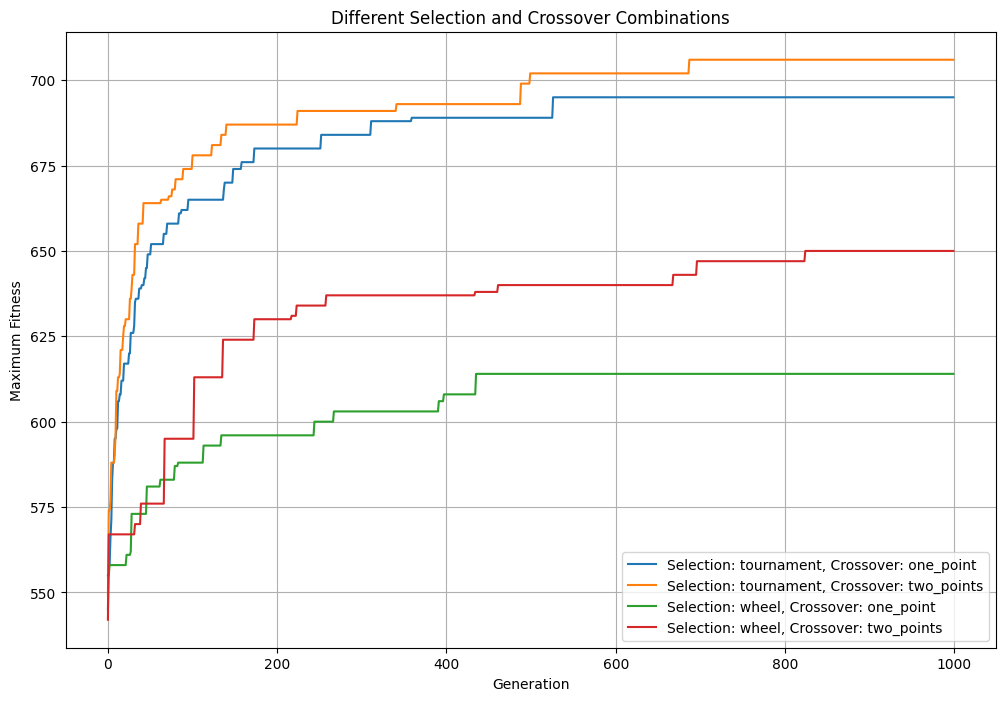


Best Combination Results
Selection: tournament, Crossover: two_points
Best Overall Fitness: 706
Execution Time for Best Combination: 1758.9750 seconds
Is the best dough valid? Yes
Best Solution:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, None, 0, 0, 0, 0, None, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, None, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [3434]:
combinations_test(
    population_size=1000,
    nb_generations=1000,
    mutation_rate=0.01,
    elitism_size=10,
    nb_selected=100
)

What we can conclude with this algorithm is that the best combination is the tournament selection with the one-point crossover. Even though the difference between one-point and two-point crossover is not huge in term of results but it's way faster with the one-point.
The elites keeping is great because it lets us not lose the good elements of our results.

**CSP**

In [3435]:
from ortools.sat.python import cp_model

In [3436]:
SIZE_DOUGH = 500

Let's create all the functions that will add the constraints to the model

In [3437]:
def add_one_biscuit_per_index_constraint(model, possible_start_indexes):
    ''' 
        Add the constraint to have only one biscuit per index
    '''
    for position in range(SIZE_DOUGH):
        model.Add(sum(possible_start_indexes[biscuit][position] for biscuit in range(len(biscuits))) <= 1)
    

In [3438]:
def add_non_overlap_constraint(model, possible_start_indexes):
    ''' 
        Add the constraint to have the biscuits not overlapping
    '''
    nb_biscuits = len(biscuits)

    for biscuit in range(nb_biscuits):
        for position in range(SIZE_DOUGH):
            for position_potential_biscuit in range(position, position + biscuits[biscuit]["length"]):
                if position + biscuits[biscuit]["length"] - 1 < SIZE_DOUGH:
                    for other_biscuit in range(nb_biscuits):
                        if biscuit != other_biscuit or position != position_potential_biscuit:
                            model.Add(possible_start_indexes[other_biscuit][position_potential_biscuit]==0).OnlyEnforceIf(possible_start_indexes[biscuit][position])


In [3439]:
def add_end_strip_constraint(model, possible_start_indexes):
    ''' 
        Add the constraint to not add biscuits in the end of the dough
    '''
    for position in range(SIZE_DOUGH):
        for biscuit in range(len(biscuits)):
            if position + biscuits[biscuit]["length"] - 1 >= SIZE_DOUGH:
                model.Add(possible_start_indexes[biscuit][position] == 0)


In [3440]:
def add_defects_constraints(model, possible_start_indexes, defects):
    ''' 
        Add the constraints that the biscuits have to respect their defects threshold
    '''
    for position in range(SIZE_DOUGH):
        for biscuit in range(len(biscuits)):
            thresholds = biscuits[biscuit]["defects_threshold"]

            for defect_type, positions in defects.items():
                defect_count = sum(position <= pos < position + biscuits[biscuit]["length"] for pos in positions)
                model.Add(defect_count <= thresholds[defect_type]).OnlyEnforceIf(possible_start_indexes[biscuit][position])

In [3441]:
def solve_problem_csp(biscuits, defects):
    
    global possible_start_indexes, profits
    nb_biscuits = len(biscuits)

    # Model
    model = cp_model.CpModel()
    
    # Decision vars
    possible_start_indexes = [[model.NewBoolVar(f'biscuit_{biscuit}_starts_at_position_{position}') for position in range(SIZE_DOUGH)] for biscuit in range(nb_biscuits)]
    
    is_dough_empty = [model.NewBoolVar(f'position_{position}_empty') for position in range(SIZE_DOUGH)]

    for position in range(SIZE_DOUGH):
        overlapped_by_biscuit = []
        for biscuit in range(nb_biscuits):
            overlapped_by_biscuit.append(sum(possible_start_indexes[biscuit][pos] for pos in range(max(0, position - biscuits[biscuit]["length"] + 1), min(position + 1, SIZE_DOUGH))))
            
        model.Add(sum(overlapped_by_biscuit) == 0).OnlyEnforceIf(is_dough_empty[position])
        model.Add(sum(overlapped_by_biscuit) != 0).OnlyEnforceIf(is_dough_empty[position].Not())

    profits = [possible_start_indexes[biscuit][position] * biscuits[biscuit]["value"] for position in range(SIZE_DOUGH) for biscuit in range(nb_biscuits)]
    loss = [is_dough_empty[position] * -1 for position in range(SIZE_DOUGH)]
    
    model.Maximize(sum(profits) + sum(loss))

    # Add constraints
    add_one_biscuit_per_index_constraint(model, possible_start_indexes)
    add_non_overlap_constraint(model, possible_start_indexes)
    add_end_strip_constraint(model, possible_start_indexes)
    add_defects_constraints(model, possible_start_indexes, defects)
    
    # Size biscuit respect

    solver = cp_model.CpSolver()
    status = solver.Solve(model)
    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        solution = [None] * SIZE_DOUGH
        profit = 0
        for position in range(SIZE_DOUGH):
            for biscuit in range(nb_biscuits):
                if solver.Value(possible_start_indexes[biscuit][position]):
                    solution[position:position + biscuits[biscuit]["length"]] = [biscuit] * biscuits[biscuit]["length"]
                    profit += biscuits[biscuit]["value"]
                
        for position in range(SIZE_DOUGH):
            if solver.Value(is_dough_empty[position]):
                profit -= 1
        return solution, profit
    else:
        return None


In [3442]:
dough_1, profit = solve_problem_csp(biscuits, defects)
print("optimal dough", dough_1)
print("final profit", profit)

optimal dough [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, None, None, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, None, 0, 0, 0, 0, None, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, None, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, None, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1

Here we have a way faster result, and a much better solution. This is why we think the CSP is more appropriate for this method